In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as geopd

In [4]:
import os

os.chdir("/workspaces/Humanitarian-activity-analysis/")

In [5]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,8)

In [6]:
org_activity_month = pd.read_csv("./Data/organisation_activity_per_month.csv", index_col = "Unnamed: 0",
                                parse_dates=["month"])

#org_activity_month = org_activity_month.set_index("month")

org_activity_month.head()

,month,organisation,projects_created,projects_edited,all_sessions,mapped_sessions,validated_sessions,sum_mapped_validated_sessions,cum_sessions,cum_mapped_sessions,cum_validated_sessions,sum_cum_mapped_validated_sessions,filter,tasking_manager_dump_timestamps
0,2012-11-01,0,0,2,130.0,97.0,32.0,129.0,130.0,97.0,32.0,129.0,all,2023-01-02 23:59:40.539208
1,2012-12-01,0,0,24,2695.0,2290.0,374.0,2664.0,2707.0,2301.0,374.0,2675.0,all,2023-01-02 23:59:40.539208
2,2012-12-01,OSM RDC,1,1,18.0,12.0,5.0,17.0,18.0,12.0,5.0,17.0,all,2023-01-02 23:59:40.539208
3,2013-01-01,0,0,39,3271.0,3104.0,127.0,3231.0,4361.0,4119.0,186.0,4305.0,all,2023-01-02 23:59:40.539208
4,2013-01-01,OSM RDC,0,1,41.0,41.0,0.0,41.0,59.0,53.0,5.0,58.0,all,2023-01-02 23:59:40.539208


In [7]:
org_activity_month.columns

Index(['month', 'organisation', 'projects_created', 'projects_edited',
       'all_sessions', 'mapped_sessions', 'validated_sessions',
       'sum_mapped_validated_sessions', 'cum_sessions', 'cum_mapped_sessions',
       'cum_validated_sessions', 'sum_cum_mapped_validated_sessions', 'filter',
       'tasking_manager_dump_timestamps'],
      dtype='object')

In [8]:
org_activity_month[['month', 'organisation', 'projects_created', 'projects_edited',
       'all_sessions', 'mapped_sessions', 'validated_sessions','sum_mapped_validated_sessions']].head()

,month,organisation,projects_created,projects_edited,all_sessions,mapped_sessions,validated_sessions,sum_mapped_validated_sessions
0,2012-11-01,0,0,2,130.0,97.0,32.0,129.0
1,2012-12-01,0,0,24,2695.0,2290.0,374.0,2664.0
2,2012-12-01,OSM RDC,1,1,18.0,12.0,5.0,17.0
3,2013-01-01,0,0,39,3271.0,3104.0,127.0,3231.0
4,2013-01-01,OSM RDC,0,1,41.0,41.0,0.0,41.0


In [9]:
org_activity_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 0 to 5384
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   month                              5385 non-null   datetime64[ns]
 1   organisation                       5385 non-null   object        
 2   projects_created                   5385 non-null   int64         
 3   projects_edited                    5385 non-null   int64         
 4   all_sessions                       5385 non-null   float64       
 5   mapped_sessions                    5385 non-null   float64       
 6   validated_sessions                 5385 non-null   float64       
 7   sum_mapped_validated_sessions      5385 non-null   float64       
 8   cum_sessions                       5385 non-null   float64       
 9   cum_mapped_sessions                5385 non-null   float64       
 10  cum_validated_sessions             5

In [10]:
org_activity_month["organisation"].nunique(), org_activity_month.shape, org_activity_month.isna().sum().sum()

(160, (5385, 14), 0)

We have 160 organisations, 5385 observations, 14 columns with none NaN values.

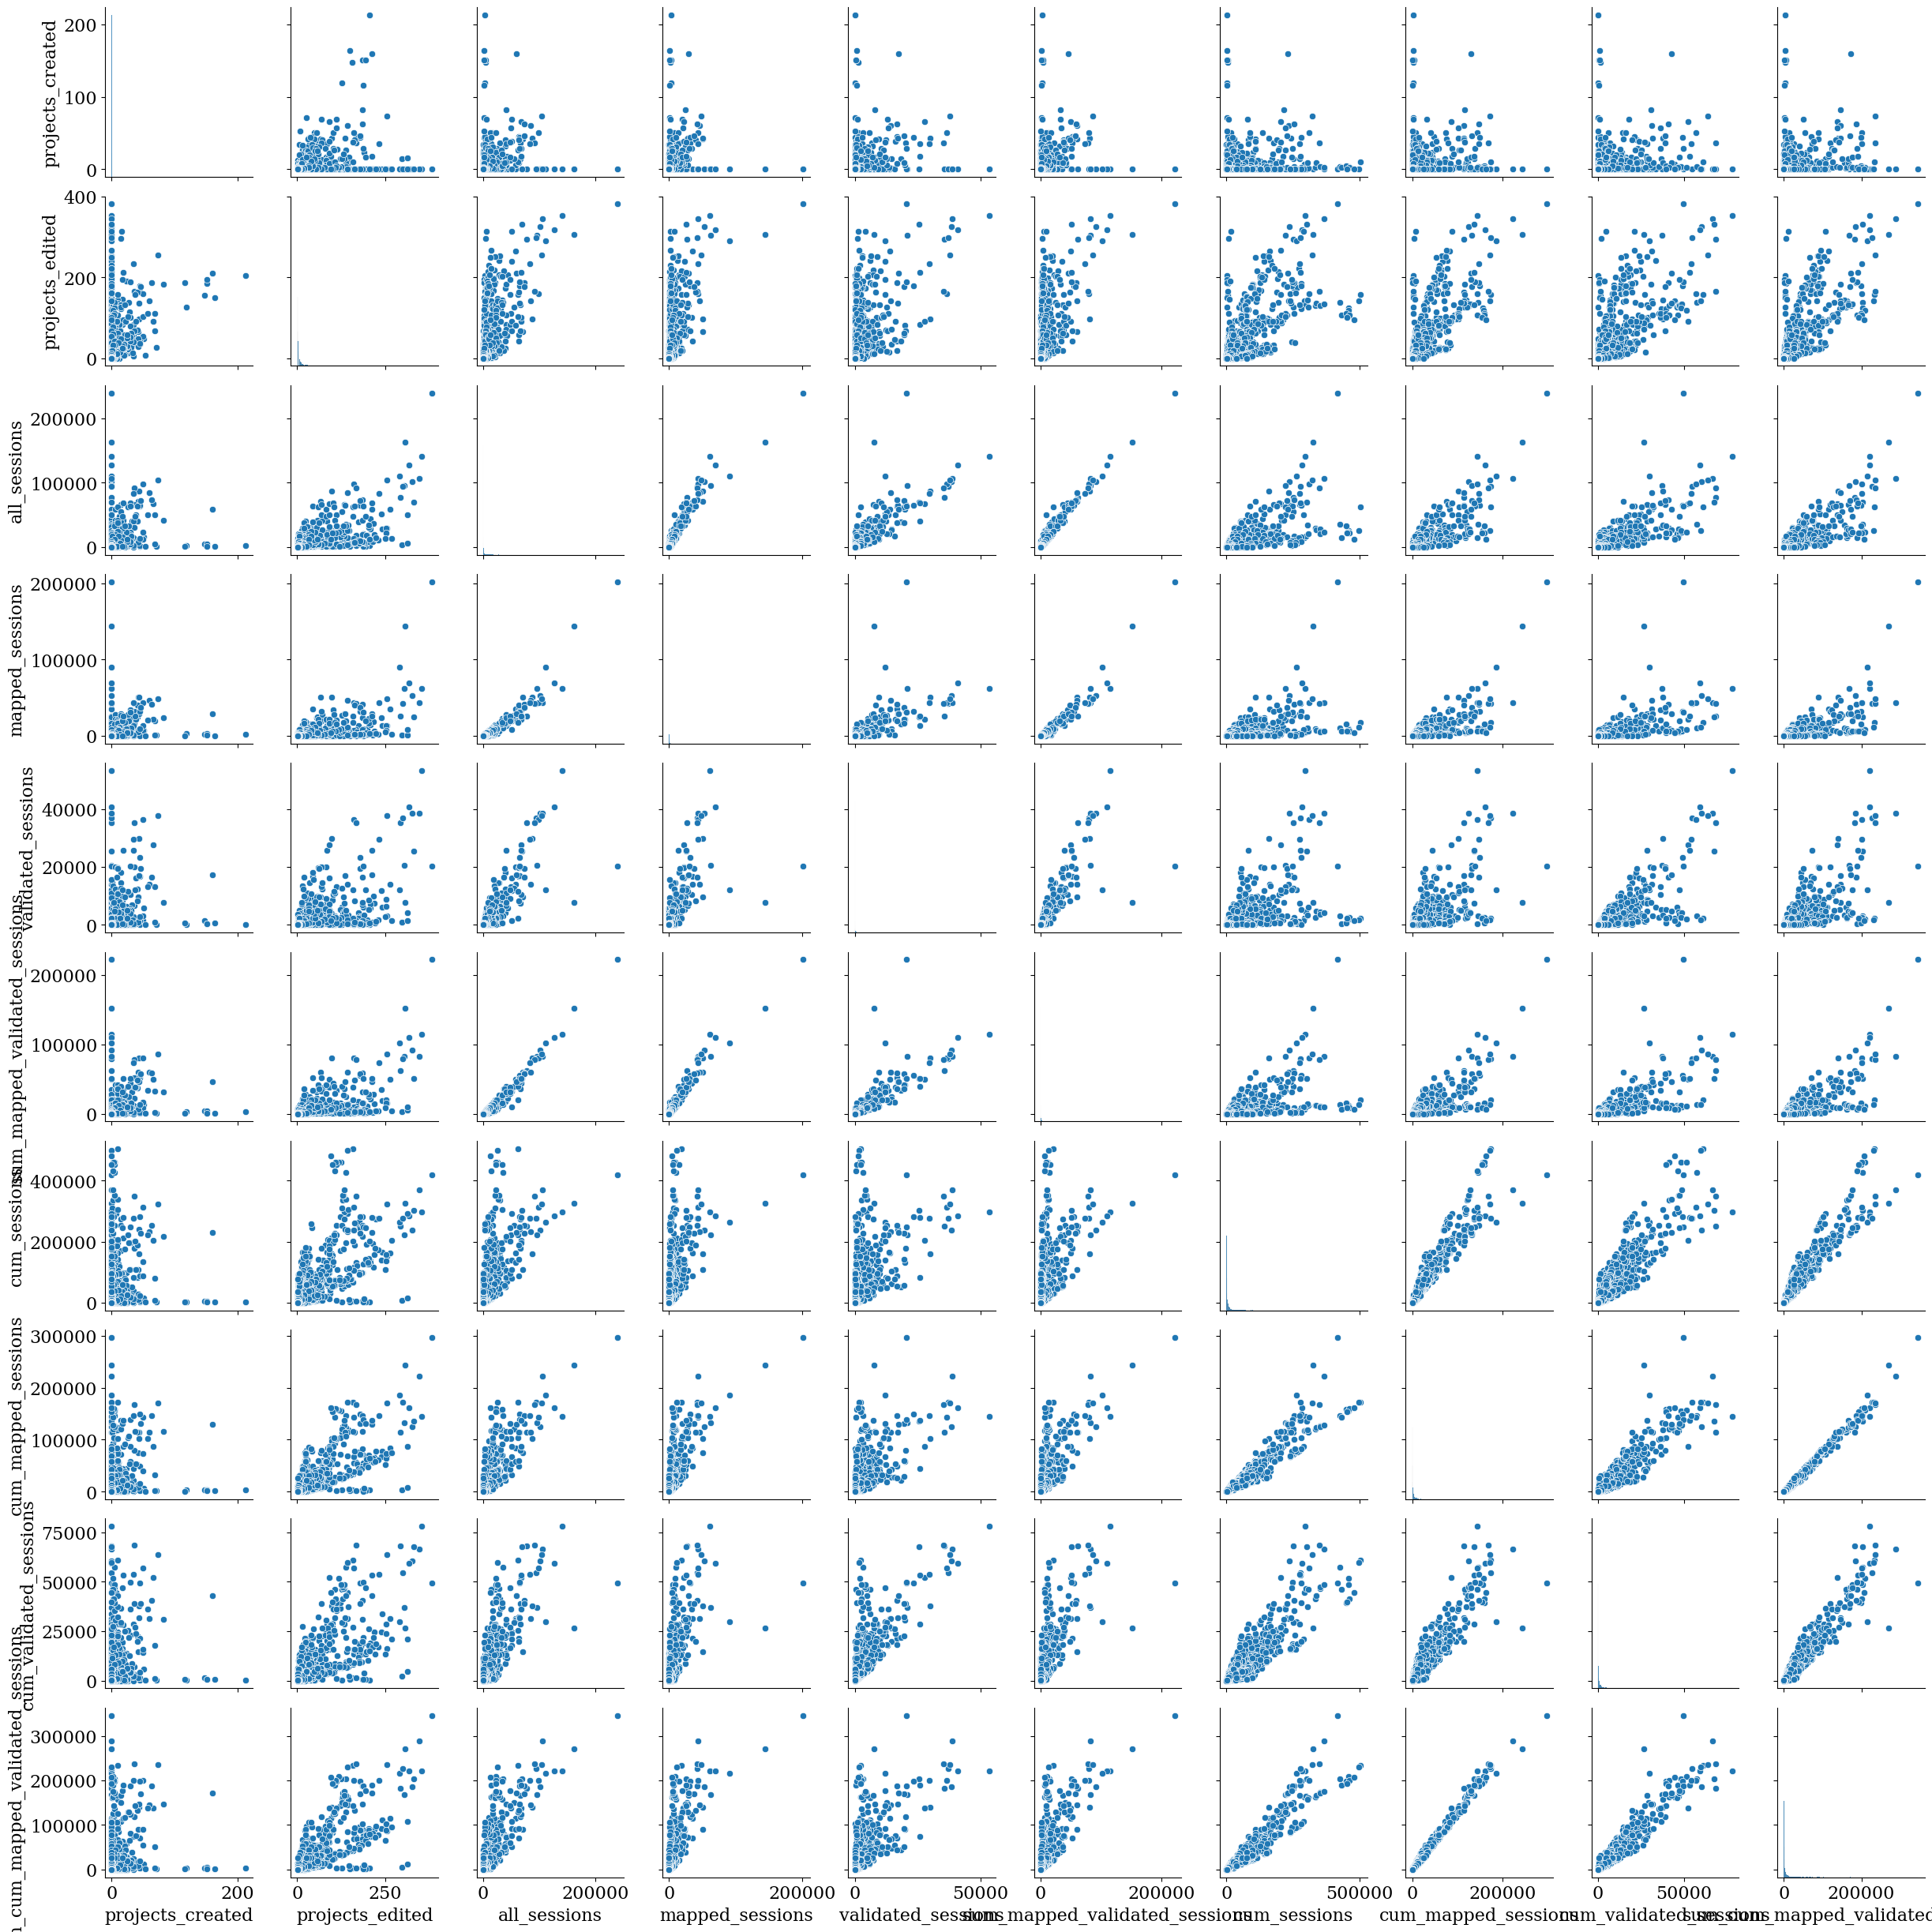

In [11]:
sns.pairplot(org_activity_month)
plt.show()

In [12]:
print(org_activity_month.skew())

projects_created                     13.731544
projects_edited                       5.697912
all_sessions                         10.550737
mapped_sessions                      19.263457
validated_sessions                   10.555278
sum_mapped_validated_sessions        13.477223
cum_sessions                          5.690493
cum_mapped_sessions                   6.399892
cum_validated_sessions                6.313415
sum_cum_mapped_validated_sessions     6.208196
dtype: float64


In [13]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox

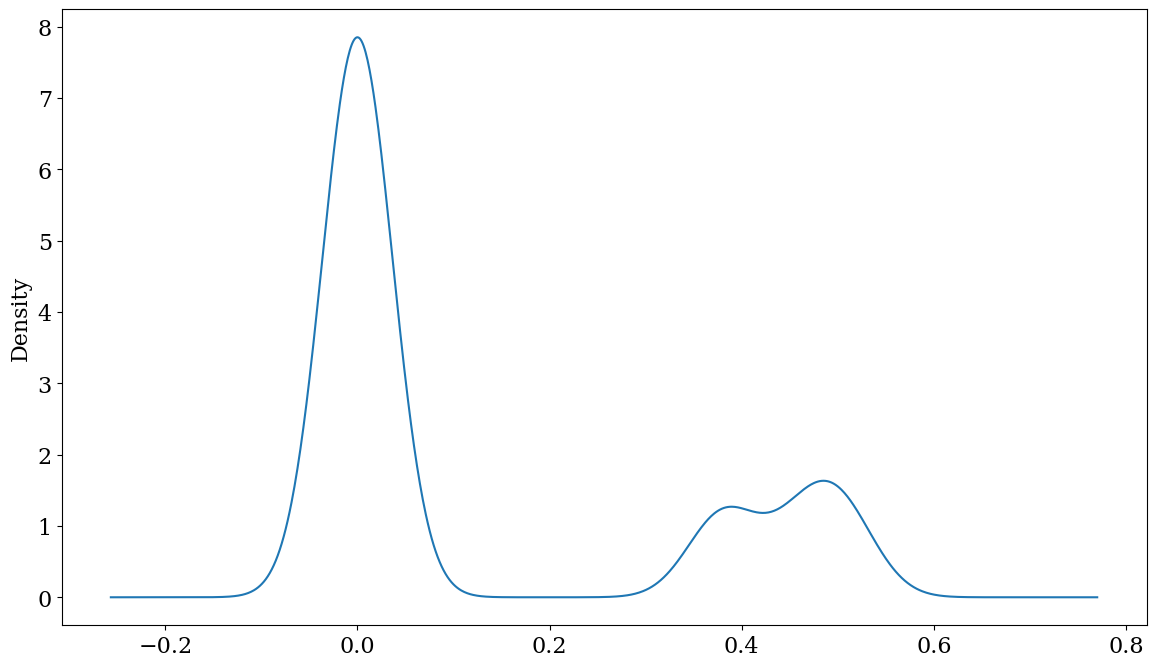

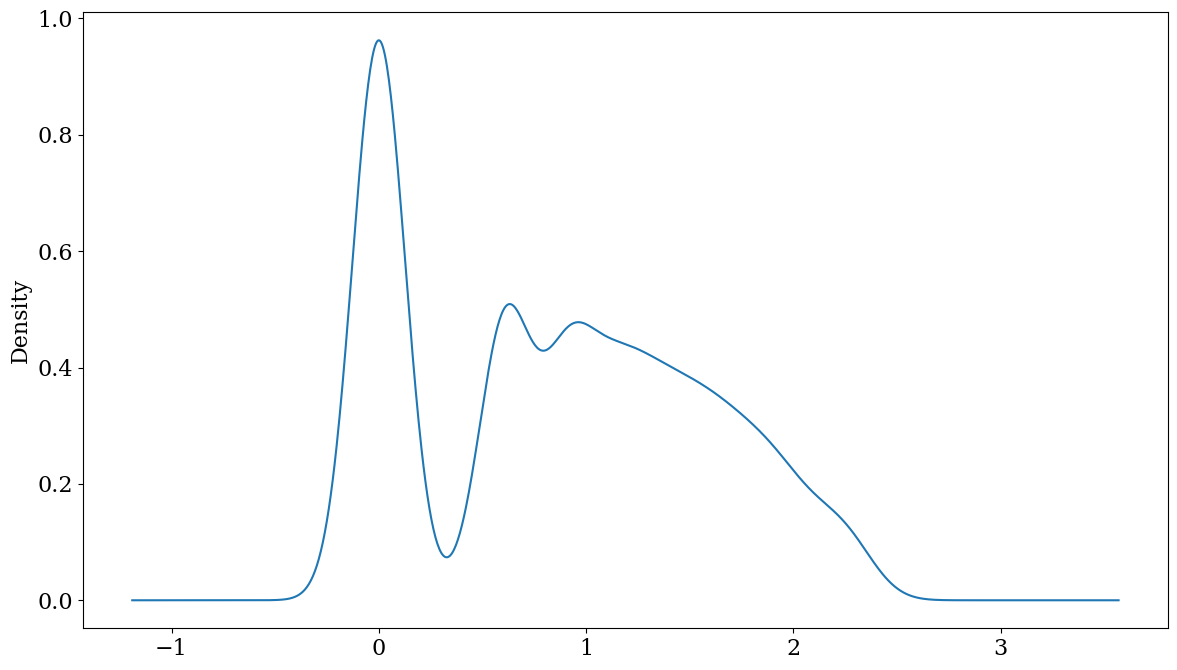

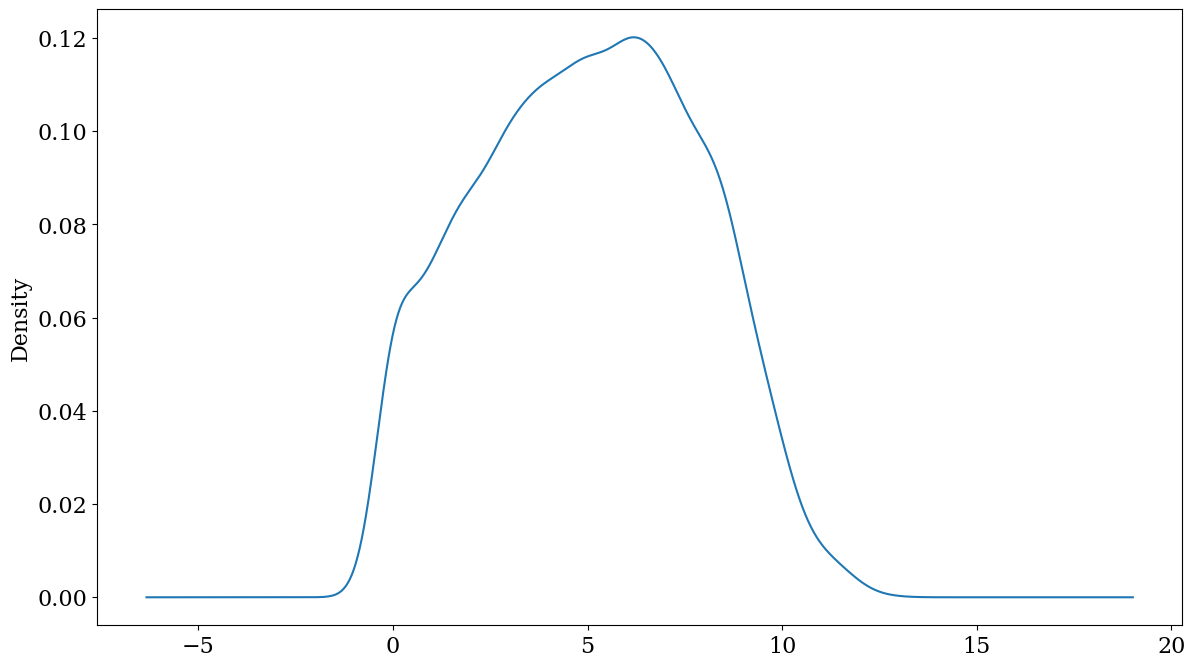

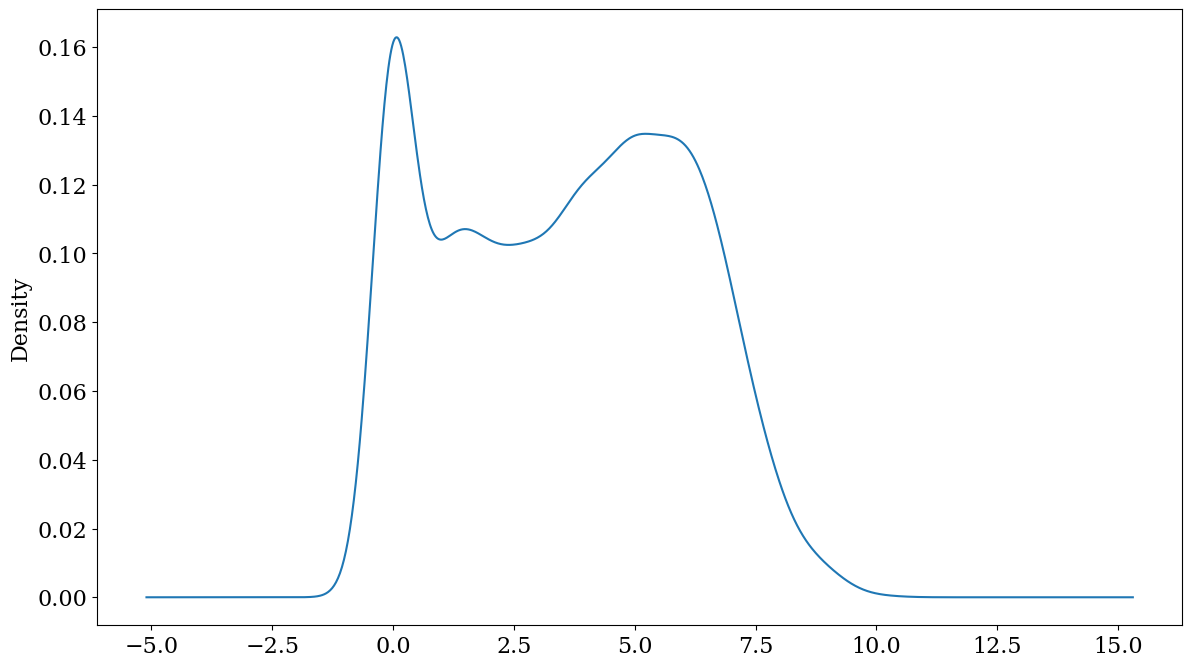

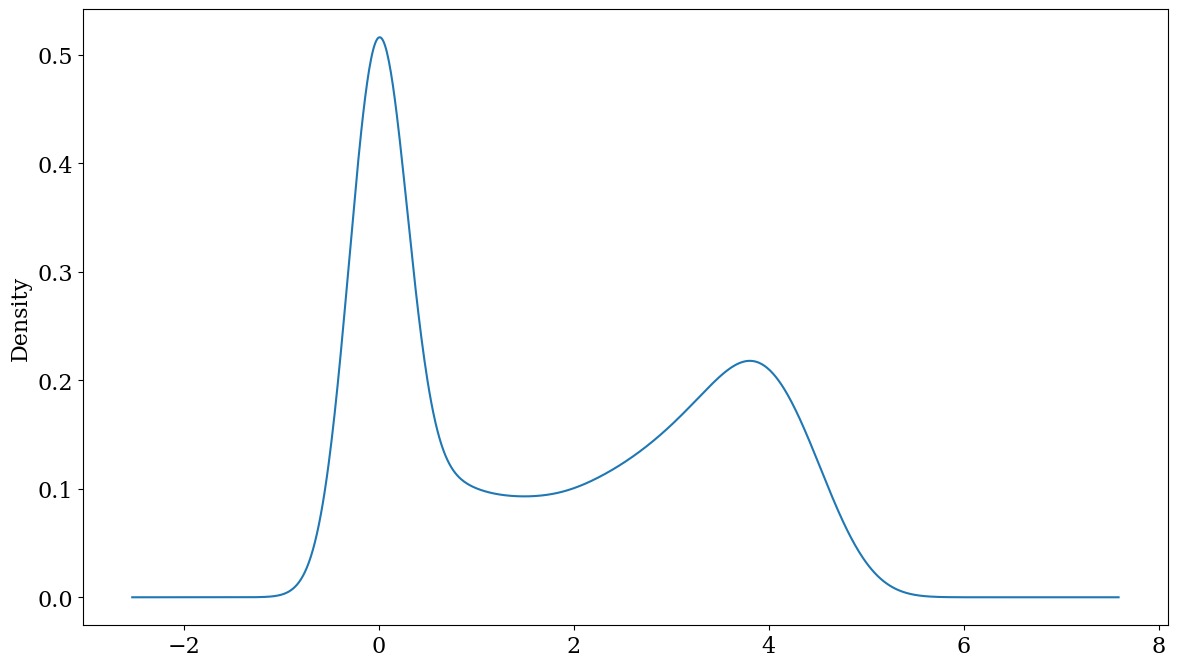

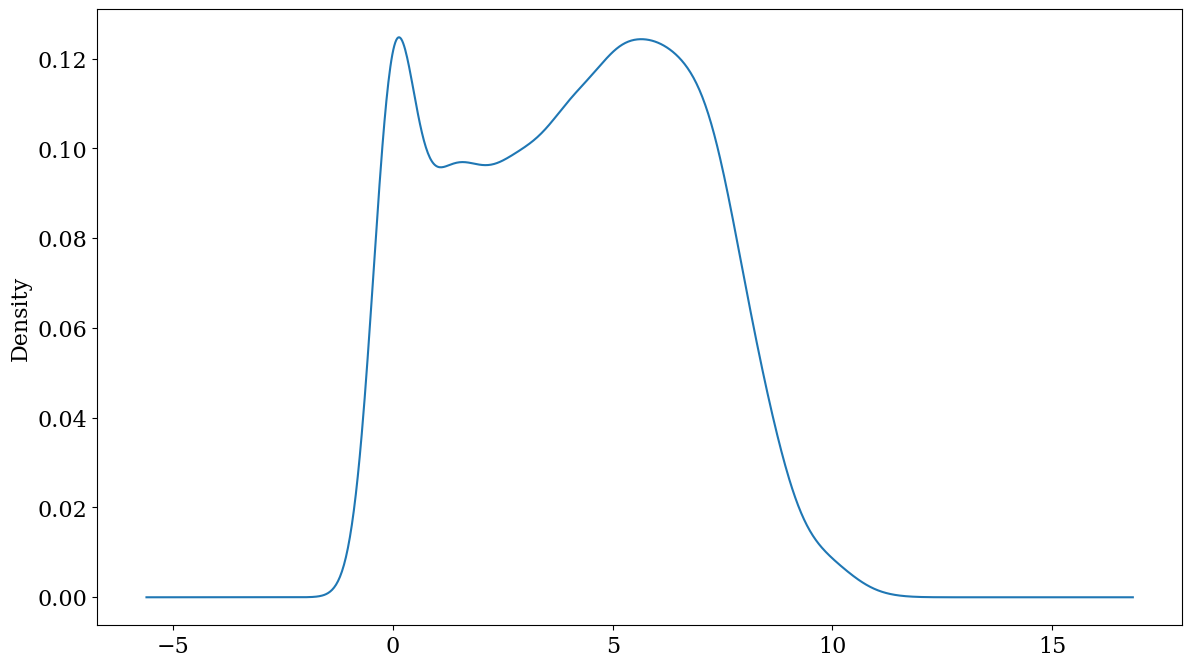

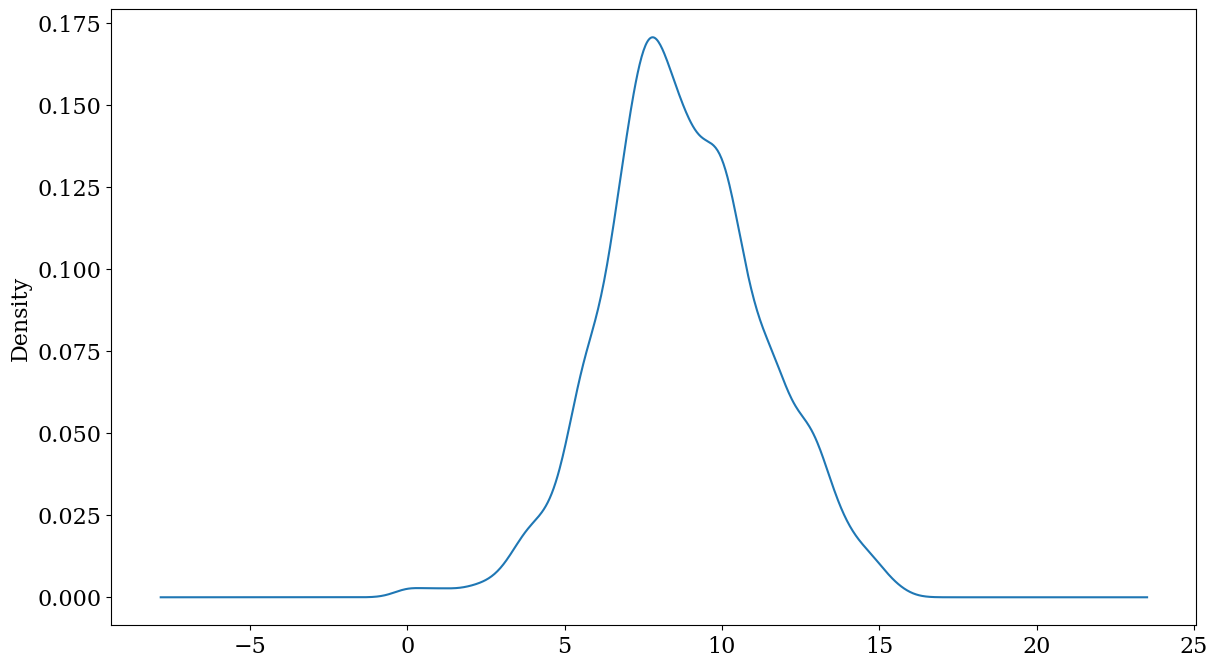

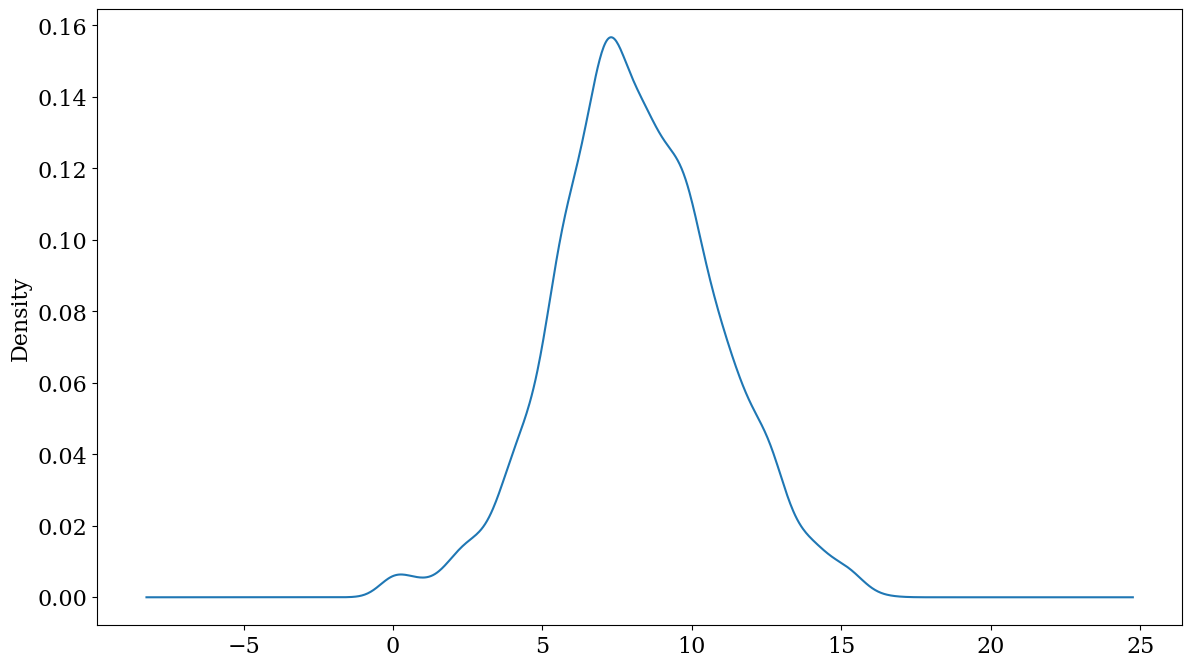

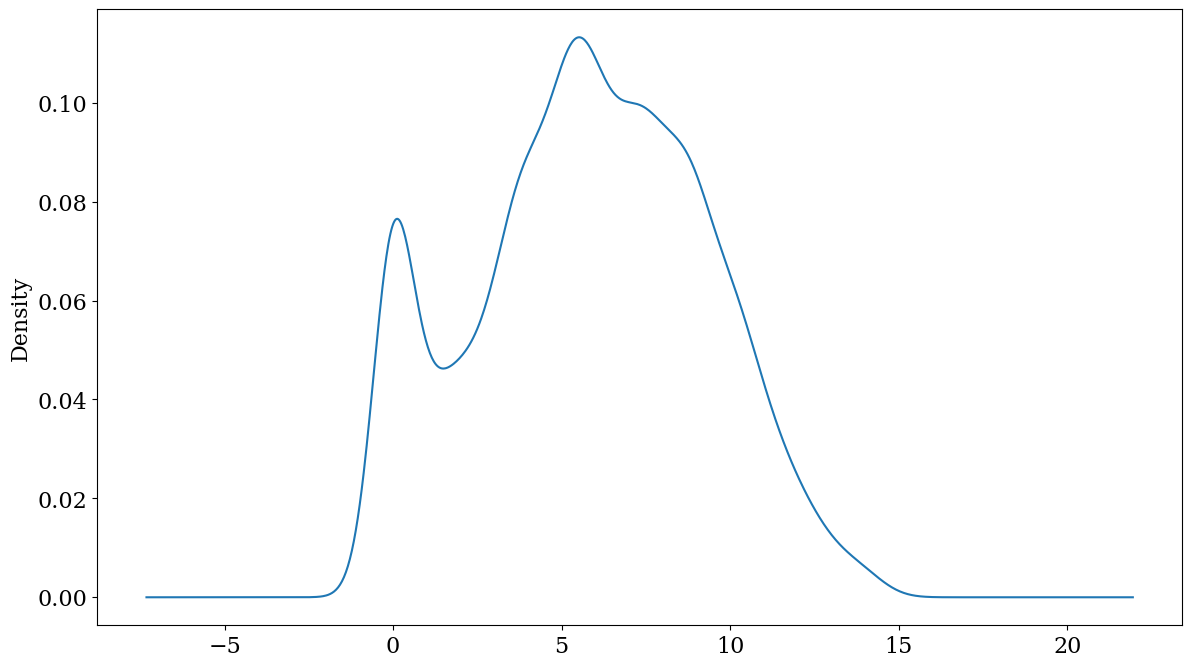

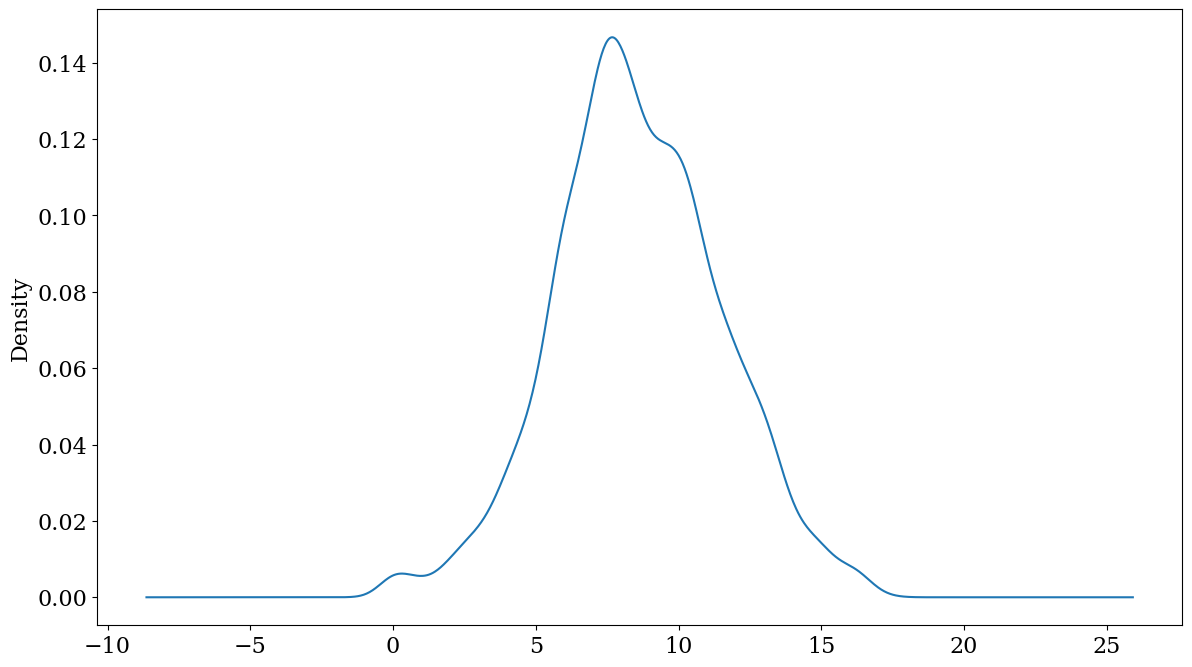

In [14]:
for col in org_activity_month.select_dtypes(include="number").columns:
    
    try:
        
        org_activity_month[col] = boxcox(org_activity_month[col])[0]
    
    except:
        
        org_activity_month[col] = boxcox(org_activity_month[col]+1)[0]
    
    org_activity_month[col].plot(kind = "density")
    #plt.xlim([-0.001,0.001])
    plt.show()

# Correlations analysis

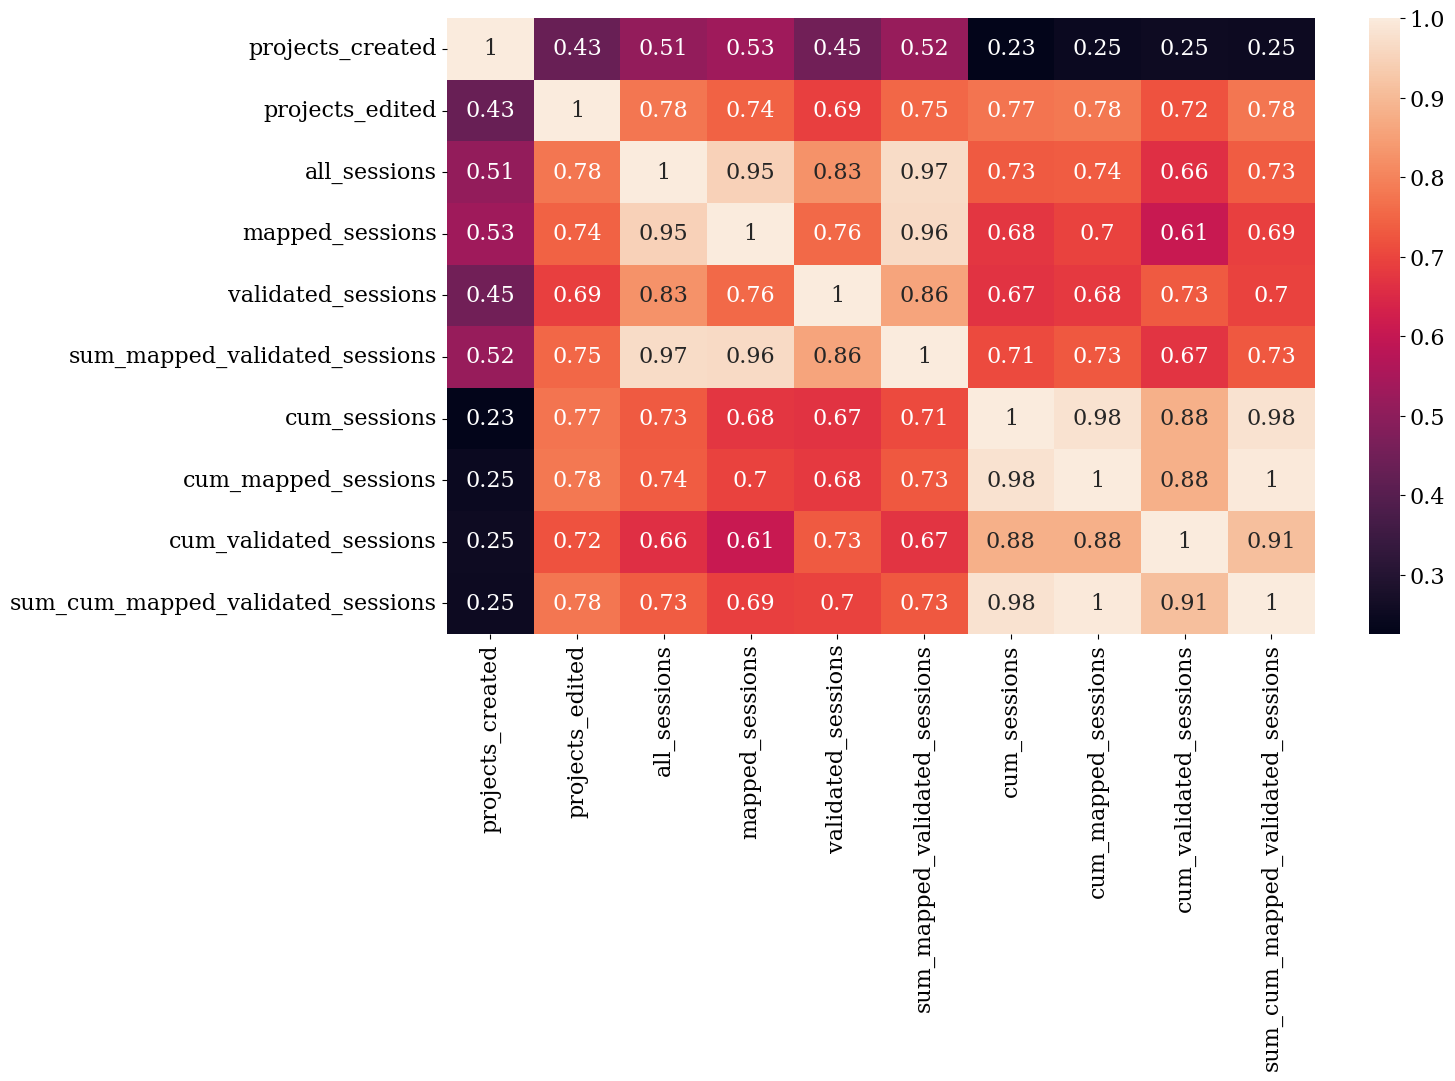

In [15]:
corr = org_activity_month.corr()

sns.heatmap(corr,annot = True)

plt.show()

In [23]:
df_groupby_org_month = org_activity_month.groupby(by = "organisation").sum().reset_index()\
.sort_values(by = "all_sessions", ascending=False).iloc[:20,:]

df_groupby_org_month.head()

,organisation,projects_created,projects_edited,all_sessions,mapped_sessions,validated_sessions,sum_mapped_validated_sessions,cum_sessions,cum_mapped_sessions,cum_validated_sessions,sum_cum_mapped_validated_sessions
0,0,0.000000,258.962862,1057.865130,820.488719,472.958265,912.797986,1563.137919,1553.075983,1320.281240,1635.874250
4,American Red Cross,35.866408,188.757807,850.919260,653.726064,380.119523,735.166908,1245.950845,1225.086404,1041.740736,1292.957291
71,Médecins Sans Frontières (MSF),38.192421,174.266965,850.004571,668.160822,388.899624,746.150447,1167.766190,1152.552089,985.729790,1217.806609
33,HOT,37.452168,160.557091,793.426044,615.964822,316.232353,686.528589,1097.188057,1088.543752,870.330105,1149.984727
139,Tanzania Development Trust,23.531293,120.804380,702.798891,541.878399,323.275049,608.058065,994.877391,964.112067,824.097230,1018.910314


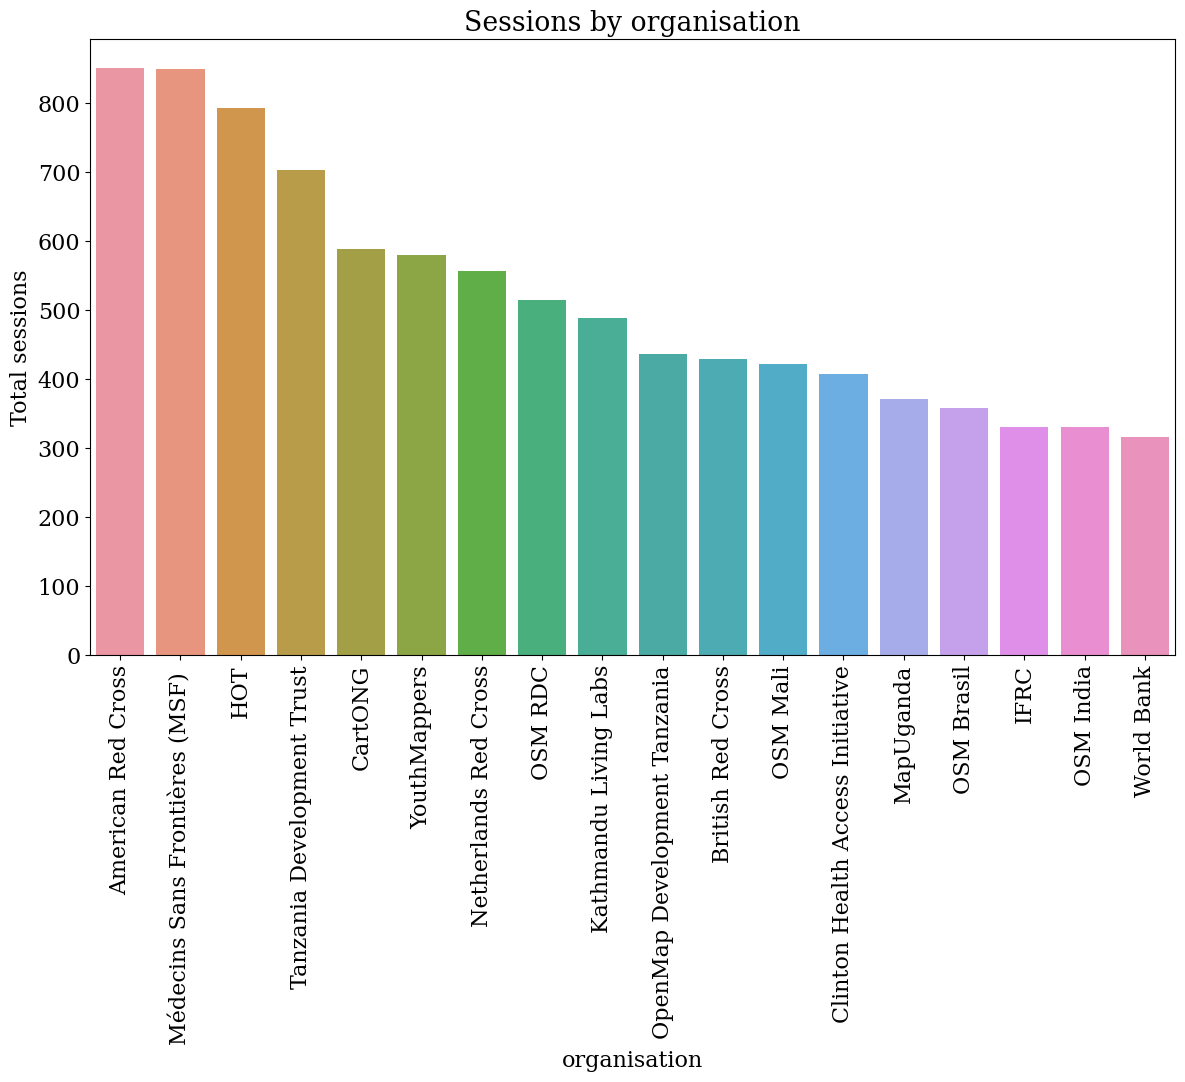

In [24]:
df_groupby_org_month = df_groupby_org_month[df_groupby_org_month["organisation"]!="0"]
df_groupby_org_month = df_groupby_org_month[df_groupby_org_month["organisation"]!="Other"]

sns.barplot(x = df_groupby_org_month.organisation, y = df_groupby_org_month.all_sessions )
plt.xticks(rotation=90)
plt.title("Sessions by organisation")
plt.ylabel("Total sessions")
plt.show()

In [18]:
def timeplot(df, cols):
    plt.rcParams.update({"font.size":14})
    
    df[cols].plot(figsize = (14,7))

    plt.xticks(rotation = 45)

    plt.show()

In [19]:
org_activity_month[["cum_projects_created",'cum_projects_edited']] = org_activity_month[["projects_created",'projects_edited']].cumsum()

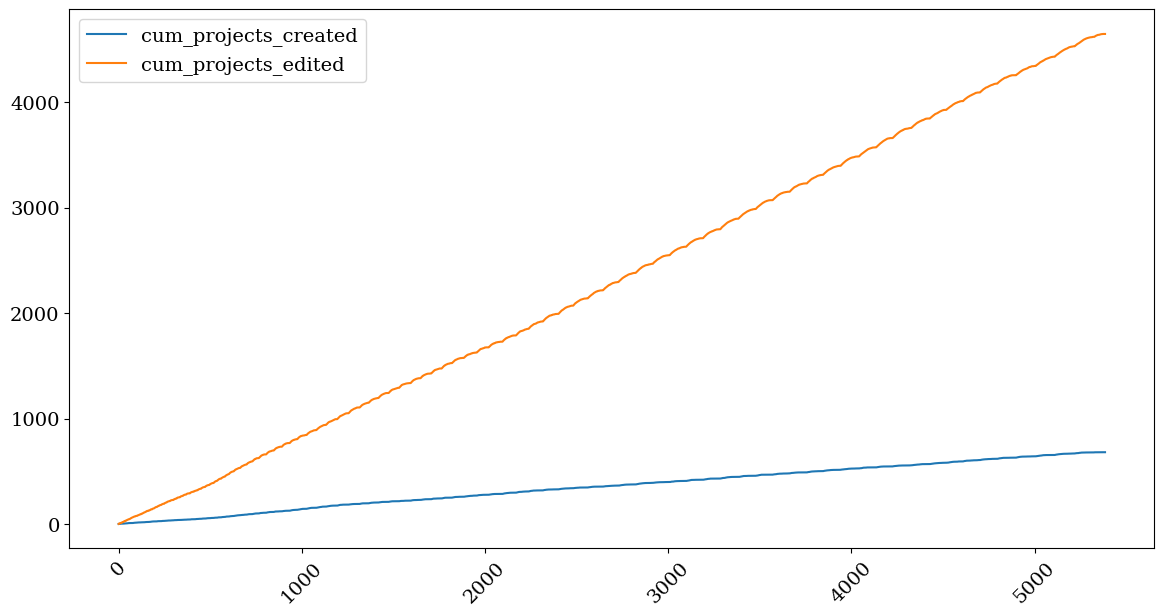

In [20]:
timeplot(org_activity_month,['cum_projects_created', 'cum_projects_edited'])

In [21]:
#timeplot(org_activity_month[org_activity_month.month.between("2012-11-01","2013-11-01")].set_index("month")
#         ,['cum_sessions'])

In [22]:
org_activity_month.head()

,month,organisation,projects_created,projects_edited,all_sessions,mapped_sessions,validated_sessions,sum_mapped_validated_sessions,cum_sessions,cum_mapped_sessions,cum_validated_sessions,sum_cum_mapped_validated_sessions,filter,tasking_manager_dump_timestamps,cum_projects_created,cum_projects_edited
0,2012-11-01,0,0.00000,0.610363,4.910969,4.279575,2.657806,4.691459,5.191345,5.044881,3.783770,5.446857,all,2023-01-02 23:59:40.539208,0.00000,0.610363
1,2012-12-01,0,0.00000,1.856583,8.013965,6.893700,3.783499,7.432493,8.780912,9.113116,6.783792,9.489896,all,2023-01-02 23:59:40.539208,0.00000,2.466947
2,2012-12-01,OSM RDC,0.38031,0.000000,2.905650,2.467433,1.551489,2.827666,3.002563,2.704863,1.865270,3.088451,all,2023-01-02 23:59:40.539208,0.38031,2.466947
3,2013-01-01,0,0.00000,1.991330,8.213391,7.132860,3.340630,7.603300,9.371094,9.922594,5.891439,10.177788,all,2023-01-02 23:59:40.539208,0.38031,4.458277
4,2013-01-01,OSM RDC,0.00000,0.000000,3.738818,3.533006,0.000000,3.633259,4.303177,4.334192,1.865270,4.479080,all,2023-01-02 23:59:40.539208,0.38031,4.458277


In [23]:
org_activity_month["year"] = org_activity_month.month.dt.year

In [24]:
agg = org_activity_month.groupby("year").sum()

In [25]:
agg

,projects_created,projects_edited,all_sessions,mapped_sessions,validated_sessions,sum_mapped_validated_sessions,cum_sessions,cum_mapped_sessions,cum_validated_sessions,sum_cum_mapped_validated_sessions,cum_projects_created,cum_projects_edited
year,,,,,,,,,,,,
2012,0.380310,2.466947,15.830585,13.640708,7.992794,14.951618,16.974820,16.862859,12.432833,18.025204,0.380310,5.544257e+00
2013,5.160004,28.824092,177.323434,159.694832,62.012367,170.567474,233.382314,241.515641,128.034802,249.540551,122.215812,6.884403e+02
2014,7.162128,45.699359,249.292449,191.915762,84.592356,207.145156,363.007512,343.127605,225.617297,362.283721,556.996982,3.466967e+03
2015,13.612132,93.468756,508.192818,356.651797,156.644343,389.794701,847.054287,772.652814,481.248286,807.738870,2310.643595,1.472618e+04
2016,20.462651,149.167366,957.308982,702.911464,324.864044,779.995116,1627.874172,1484.165503,971.226959,1562.152601,7835.954897,5.294649e+04
2017,46.861613,273.865481,1668.110973,1251.952608,639.769619,1421.088773,2594.214388,2456.906894,1768.974502,2586.263239,20673.905027,1.366026e+05
2018,96.373717,511.286258,2958.613606,2142.251527,1171.519263,2496.210787,4954.742271,4698.513694,3481.475693,4982.346746,85192.711871,5.010392e+05
2019,86.712804,570.080778,3214.188131,2209.084891,1140.533009,2571.124652,6092.209772,5694.693010,4126.315589,6025.960911,164699.428807,9.908781e+05
2020,120.497889,874.208071,5016.726313,3484.755269,1753.909319,4018.974671,8858.765870,8256.558762,5903.482140,8707.979402,338005.793531,2.089652e+06


In [26]:
import numpy as np
import dowhy
from dowhy import CausalModel
import dowhy.datasets

In [27]:
org_activity_month.columns

Index(['month', 'organisation', 'projects_created', 'projects_edited',
       'all_sessions', 'mapped_sessions', 'validated_sessions',
       'sum_mapped_validated_sessions', 'cum_sessions', 'cum_mapped_sessions',
       'cum_validated_sessions', 'sum_cum_mapped_validated_sessions', 'filter',
       'tasking_manager_dump_timestamps', 'cum_projects_created',
       'cum_projects_edited', 'year'],
      dtype='object')

In [28]:
model = dowhy.CausalModel(data=org_activity_month,
                     #graph=dot.source.replace("\t", ' ').replace("\n", ' '),
                     treatment='mapped_sessions',
                     outcome='validated_sessions')

In [29]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Estimate Causal Effect with propensity score stratifications
estimate = model.estimate_effect(identified_estimand, 
                                
                                 method_name="backdoor.linear_regression",
                                
                                 target_units="att")

print(f"Estimated average treatment effect on the treated {estimate.value:.3}")

Estimated average treatment effect on the treated 0.521


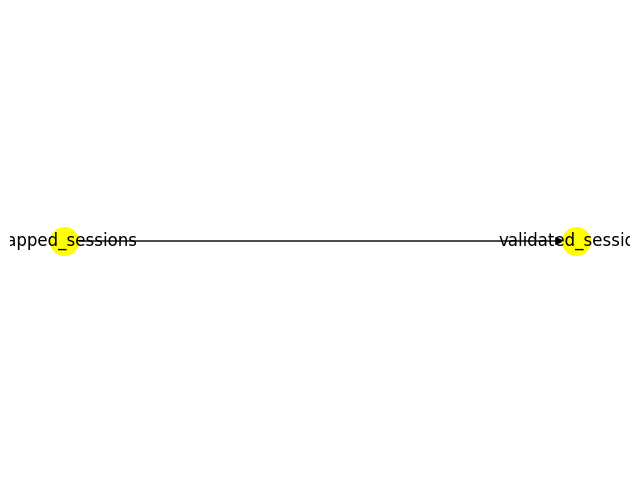

In [30]:
model.view_model()

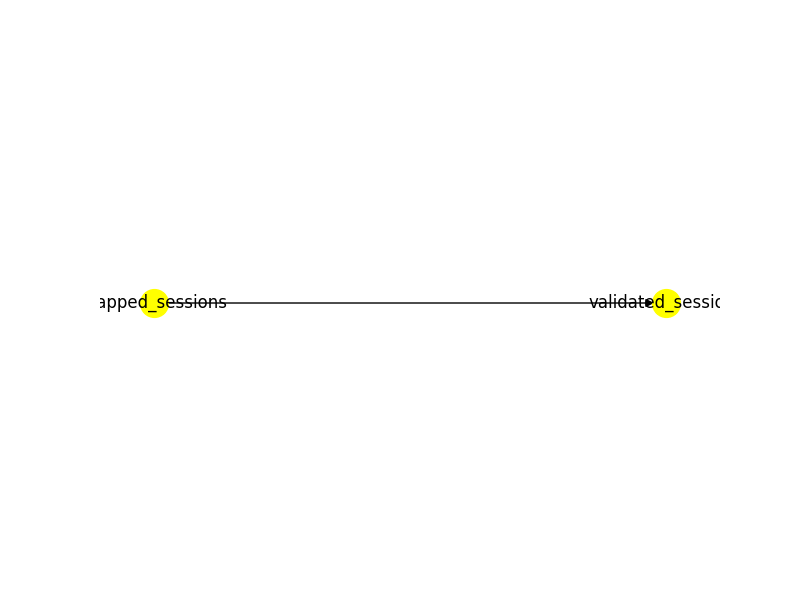

Bad pipe message: %s [b'\x84Mok\xfb3\xfcJ\x10\xa5\xfc\xf2\xb0R\xee\xf2 \xd3\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00C\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x1c\x00\x1a\x00\x17\x00\x19\x00\x1c\x00\x1b\x00\x18\x00\x1a\x00\x16\x00\x0e\x00\r']
Bad pipe message: %s [b'3\xf8\x8b\x12\xeb\x13eb\xdf+0gk#q\xb1\nP\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc0\t\x003\x002\x001\x000\x00\x9a\x00\x99\x00']
Bad pipe message: %s [b'\x97\x00E\x00D\x00C\x00B\xc0\x18\x004\x00\x9b\x00F\xc0\x0e\xc0\x04\x00/\x00\x96\x00A\x00\x07\xc0\x11\xc0\x07\xc0\x16\x00\x18\xc0\x0c\xc0\x02\x00\x05\x00\x04\xc0\x12\xc0\x08\x00\x16\x00\x13\x00\x10\x00\r\xc0\x17\x00\x1b\xc0\r\xc0\x03\x00\n\x00

In [31]:
from IPython.display import Image, display

display(Image(filename="causal_model.png"))